In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/home/ignatsonets/Downloads/porph_all_data_tables/porph_reads_count.csv',sep=',')
df.head(10)

,Sample,R1_reads,Reads_total,Reads_hsa,percent
0,MPAR_124,73954295,147908590,52903682,35.767823
1,MPAR_125,87051738,174103476,93719593,53.829823
2,MPAR_126,51408136,102816272,60474431,58.817957
3,MPAR_127,61847841,123695682,92324275,74.638236
4,MPAR_128,61253809,122507618,99354037,81.100293
5,MPAR_129,43606603,87213206,48948056,56.124592
6,MPAR_132,54276511,108553022,84703366,78.029487
7,MPAR_133,51879351,103758702,65013378,62.658241
8,MPAR_200,64465412,128930824,114396225,88.726824
9,MPAR_201,62593082,125186164,68029239,54.342458


In [3]:
y1 = df.iloc[:, 2] 
y1

0     147908590
1     174103476
2     102816272
3     123695682
4     122507618
5      87213206
6     108553022
7     103758702
8     128930824
9     125186164
10     77291890
11     70093052
12    146678338
13    174027582
14    145435388
15     93046480
16    170854938
17    111396966
18    164285230
19     99213714
20     99055828
21     83023164
22    135880326
23     84307732
24     43427800
25     94432620
26     77796158
27    166435484
28     65684176
29     60371972
Name: Reads_total, dtype: int64

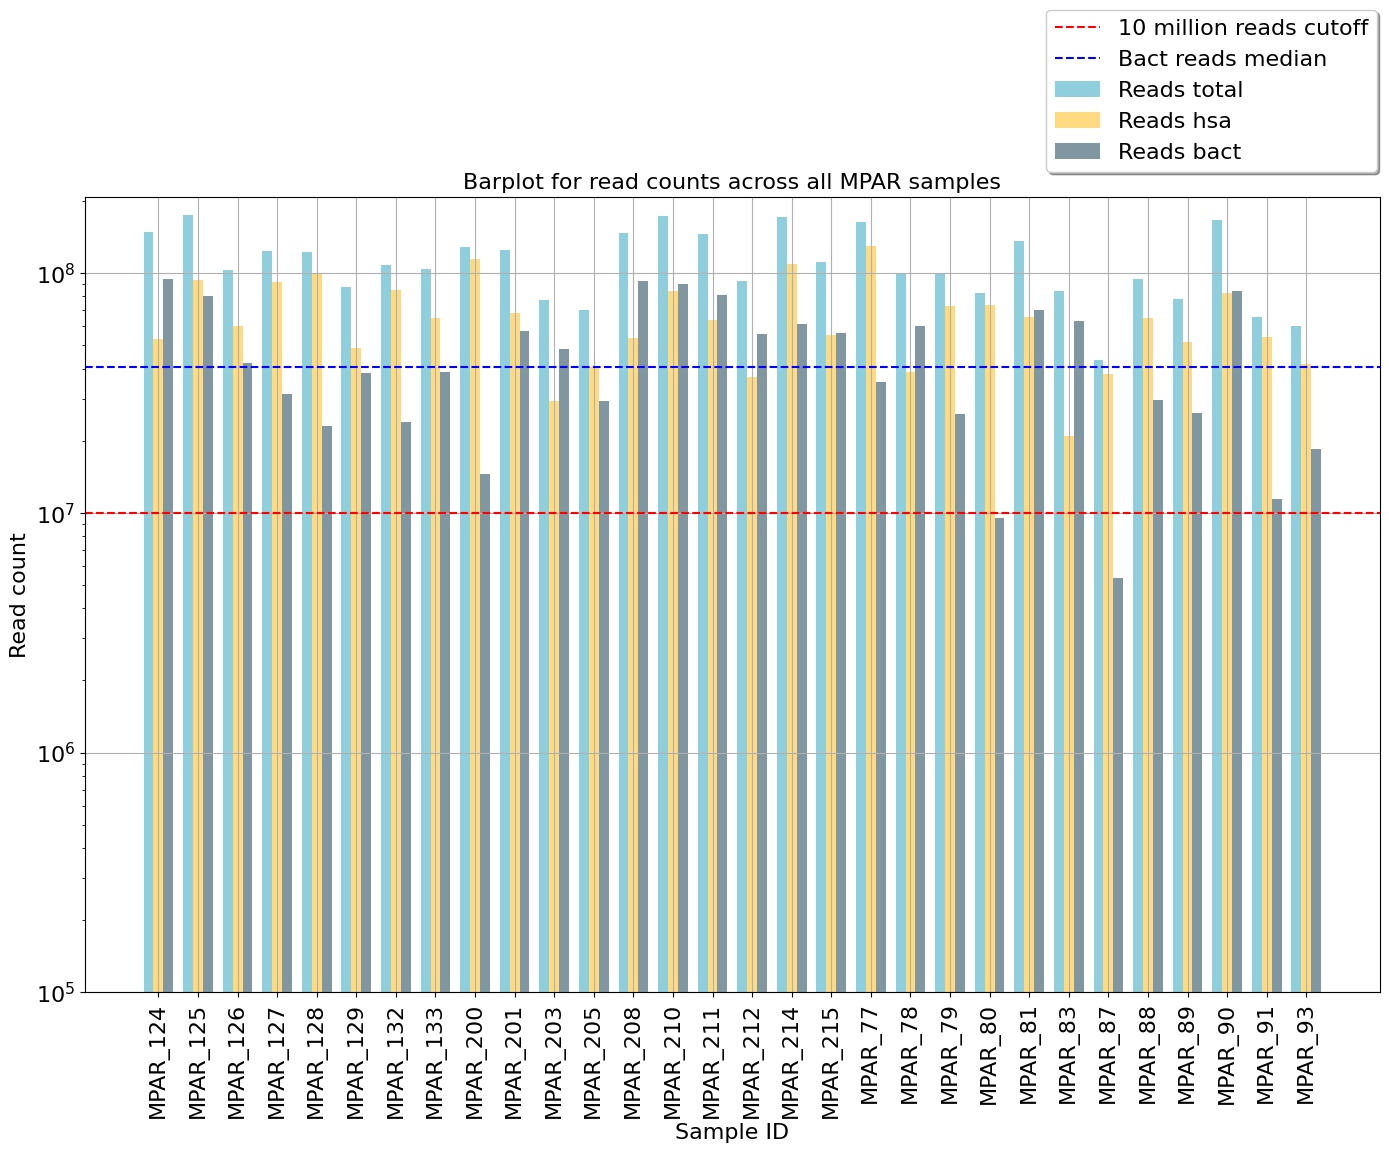

In [12]:
# Select the x values and the y values
x = df.iloc[:, 0]    # 1st column for x values
y1 = df.iloc[:, 2]   # 3rd column for y values (first bar)
y2 = df.iloc[:, 3]   # 4th column for y values (second bar)

# Calculate the difference for the third bar plot
difference = y1 - y2
med = np.median(difference)

# Create a figure and axis with a wider size
fig, ax = plt.subplots(figsize=(14, 10))  # Increased size for better visibility

# Set width of bar
width = 0.25  # Adjust bar width for better spacing

# Set x locations for bars
x_indices = range(len(x))

# Plot the bar plots
ax.bar(x_indices, y1, width=width, alpha=0.5, label='Reads total', color='#219ebc')
ax.bar([i + width for i in x_indices], y2, width=width, alpha=0.5, label='Reads hsa', color='#ffb703')
ax.bar([i + 2*width for i in x_indices], difference, width=width, alpha=0.5, label='Reads bact', color='#023047')

# Configure axis labels and title
ax.set_xlabel('Sample ID', fontsize=16)
ax.set_ylabel('Read count', fontsize=16)
ax.set_title('Barplot for read counts across all MPAR samples', fontsize=16)
ax.set_xticks([i + width for i in x_indices])  # Set the x-tick positions to be in the middle of three bars
ax.set_xticklabels(x, rotation=90)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)# Set x-ticks to be x values from the 1st column
ax.legend()
ax.grid(True)

# Set y-axis to log scale
ax.set_yscale('log')  
ax.set_ylim(bottom=1e5)  

# Add a horizontal line at height of 10 million
ax.axhline(10e6, color='red', linestyle='--', label='10 million reads cutoff',linewidth=1.5)
ax.axhline(med, color='blue', linestyle='--', label='Bact reads median',linewidth=1.5)
# Show the plot
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.87, 1.25),
          fancybox=True, shadow=True,fontsize=16)
plt.savefig('/home/ignatsonets/readcount_upd_bigfont_moved_legend.png', format='png',dpi =300,bbox_inches="tight")
plt.show()

In [21]:
print(np.median(difference))

40543582.5
